# Task 4

### Deep learning : Build a neural net model for binary classification (Data :- deep_learning.csv)

In [152]:
# Import libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 5
plot_size[1] = 5
plt.rcParams["figure.figsize"] = plot_size

# a. Create train/test set and construct a model 

In [113]:
data=pd.read_csv('../Data/deep_learning.csv')

In [114]:
data.head(2)

,Number of times pregnant,glucose concentration,blood pressure,Triceps thickness,insulin level,Body mass index,Diabetes pedigree function,Age,Diabetes result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [115]:
data["Diabetes result"].value_counts()

0    500
1    268
Name: Diabetes result, dtype: int64

In [116]:
X=data.drop('Diabetes result',axis=1).values
y=data["Diabetes result"].values

In [144]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=7,stratify=y)

In [145]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [165]:
#define a sequentail Model
model = Sequential()

#Hidden Layer-1
model.add(Dense(100,activation='relu',input_dim=8,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2, noise_shape=None, seed=42))

#Hidden Layer-2
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2, noise_shape=None, seed=42))

#Output layer
model.add(Dense(1,activation='sigmoid'))

In [166]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=[tf.keras.metrics.Precision()])

In [167]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 100)               900       
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 101       
Total params: 11,101
Trainable params: 11,101
Non-trainable params: 0
_________________________________________________________________


In [168]:
model_output = model.fit(x_train,y_train,epochs=500,batch_size=20,verbose=1,validation_data=(x_test,y_test),)

Epoch 1/500
31/31 [==============================] - 1s 12ms/step - loss: 6.5970 - precision_1: 0.3745 - val_loss: 2.4915 - val_precision_1: 0.4706
Epoch 2/500
31/31 [==============================] - 0s 3ms/step - loss: 4.1286 - precision_1: 0.3920 - val_loss: 2.0457 - val_precision_1: 0.4118
Epoch 3/500
31/31 [==============================] - 0s 4ms/step - loss: 3.4910 - precision_1: 0.4031 - val_loss: 2.1519 - val_precision_1: 0.3548
Epoch 4/500
31/31 [==============================] - 0s 4ms/step - loss: 2.7588 - precision_1: 0.4244 - val_loss: 1.8865 - val_precision_1: 0.3542
Epoch 5/500
31/31 [==============================] - 0s 4ms/step - loss: 2.2326 - precision_1: 0.4777 - val_loss: 1.6100 - val_precision_1: 0.4521
Epoch 6/500
31/31 [==============================] - 0s 3ms/step - loss: 1.9769 - precision_1: 0.4206 - val_loss: 1.5124 - val_precision_1: 0.5000
Epoch 7/500
31/31 [==============================] - 0s 3ms/step - loss: 1.8701 - precision_1: 0.4594 - val_loss: 1.3

31/31 [==============================] - 0s 5ms/step - loss: 0.6564 - precision_1: 0.7056 - val_loss: 0.6785 - val_precision_1: 0.6111
Epoch 112/500
31/31 [==============================] - 0s 4ms/step - loss: 0.6521 - precision_1: 0.6936 - val_loss: 0.6771 - val_precision_1: 0.5745
Epoch 113/500
31/31 [==============================] - 0s 4ms/step - loss: 0.6180 - precision_1: 0.6895 - val_loss: 0.6570 - val_precision_1: 0.5263
Epoch 114/500
31/31 [==============================] - 0s 4ms/step - loss: 0.6671 - precision_1: 0.5712 - val_loss: 0.6801 - val_precision_1: 0.6176
Epoch 115/500
31/31 [==============================] - 0s 4ms/step - loss: 0.6427 - precision_1: 0.6827 - val_loss: 0.6903 - val_precision_1: 0.5435
Epoch 116/500
31/31 [==============================] - 0s 4ms/step - loss: 0.6523 - precision_1: 0.6294 - val_loss: 0.6717 - val_precision_1: 0.6250
Epoch 117/500
31/31 [==============================] - 0s 4ms/step - loss: 0.6323 - precision_1: 0.7155 - val_loss: 0.65

31/31 [==============================] - 0s 5ms/step - loss: 0.5270 - precision_1: 0.7577 - val_loss: 0.5670 - val_precision_1: 0.6216
Epoch 167/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5685 - precision_1: 0.7379 - val_loss: 0.6165 - val_precision_1: 0.5588
Epoch 168/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5464 - precision_1: 0.6930 - val_loss: 0.5578 - val_precision_1: 0.6170
Epoch 169/500
31/31 [==============================] - 0s 5ms/step - loss: 0.6009 - precision_1: 0.6098 - val_loss: 0.5959 - val_precision_1: 0.5517
Epoch 170/500
31/31 [==============================] - 0s 5ms/step - loss: 0.5568 - precision_1: 0.6753 - val_loss: 0.5755 - val_precision_1: 0.7419
Epoch 171/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5471 - precision_1: 0.7640 - val_loss: 0.5641 - val_precision_1: 0.5800
Epoch 172/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5609 - precision_1: 0.6161 - val_loss: 0.55

31/31 [==============================] - 0s 4ms/step - loss: 0.5203 - precision_1: 0.7382 - val_loss: 0.5587 - val_precision_1: 0.6087
Epoch 222/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5156 - precision_1: 0.7004 - val_loss: 0.5703 - val_precision_1: 0.7037
Epoch 223/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5205 - precision_1: 0.7264 - val_loss: 0.5431 - val_precision_1: 0.7273
Epoch 224/500
31/31 [==============================] - 0s 5ms/step - loss: 0.5220 - precision_1: 0.6601 - val_loss: 0.5869 - val_precision_1: 0.6410
Epoch 225/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5453 - precision_1: 0.6770 - val_loss: 0.5813 - val_precision_1: 0.6667
Epoch 226/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5307 - precision_1: 0.7586 - val_loss: 0.5359 - val_precision_1: 0.7931
Epoch 227/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5105 - precision_1: 0.7394 - val_loss: 0.53

31/31 [==============================] - 0s 7ms/step - loss: 0.5005 - precision_1: 0.7438 - val_loss: 0.5237 - val_precision_1: 0.6154
Epoch 277/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4957 - precision_1: 0.7082 - val_loss: 0.5468 - val_precision_1: 0.6857
Epoch 278/500
31/31 [==============================] - 0s 5ms/step - loss: 0.5268 - precision_1: 0.7060 - val_loss: 0.5294 - val_precision_1: 0.6750
Epoch 279/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4931 - precision_1: 0.7528 - val_loss: 0.5313 - val_precision_1: 0.6750
Epoch 280/500
31/31 [==============================] - 0s 5ms/step - loss: 0.5119 - precision_1: 0.6609 - val_loss: 0.4994 - val_precision_1: 0.7000
Epoch 281/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4828 - precision_1: 0.7760 - val_loss: 0.5878 - val_precision_1: 0.5517
Epoch 282/500
31/31 [==============================] - 0s 6ms/step - loss: 0.5132 - precision_1: 0.6750 - val_loss: 0.52

31/31 [==============================] - 0s 5ms/step - loss: 0.5022 - precision_1: 0.7243 - val_loss: 0.5211 - val_precision_1: 0.6944
Epoch 332/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5267 - precision_1: 0.7269 - val_loss: 0.5227 - val_precision_1: 0.7353
Epoch 333/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4774 - precision_1: 0.7202 - val_loss: 0.5039 - val_precision_1: 0.6739
Epoch 334/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4882 - precision_1: 0.7711 - val_loss: 0.5374 - val_precision_1: 0.7273
Epoch 335/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4850 - precision_1: 0.7183 - val_loss: 0.5172 - val_precision_1: 0.6750
Epoch 336/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4838 - precision_1: 0.6947 - val_loss: 0.4988 - val_precision_1: 0.7073
Epoch 337/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5148 - precision_1: 0.6850 - val_loss: 0.58

31/31 [==============================] - 0s 5ms/step - loss: 0.4929 - precision_1: 0.6848 - val_loss: 0.5000 - val_precision_1: 0.7209
Epoch 387/500
31/31 [==============================] - 0s 5ms/step - loss: 0.5351 - precision_1: 0.6280 - val_loss: 0.5364 - val_precision_1: 0.6531
Epoch 388/500
31/31 [==============================] - 0s 4ms/step - loss: 0.4808 - precision_1: 0.7138 - val_loss: 0.5114 - val_precision_1: 0.6977
Epoch 389/500
31/31 [==============================] - 0s 8ms/step - loss: 0.4659 - precision_1: 0.7180 - val_loss: 0.5294 - val_precision_1: 0.7179
Epoch 390/500
31/31 [==============================] - 0s 7ms/step - loss: 0.5011 - precision_1: 0.6922 - val_loss: 0.5003 - val_precision_1: 0.7317
Epoch 391/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4732 - precision_1: 0.7470 - val_loss: 0.5083 - val_precision_1: 0.6889
Epoch 392/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4650 - precision_1: 0.6788 - val_loss: 0.52

Epoch 496/500
31/31 [==============================] - 0s 4ms/step - loss: 0.4809 - precision_1: 0.6644 - val_loss: 0.5101 - val_precision_1: 0.7429
Epoch 497/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4684 - precision_1: 0.7477 - val_loss: 0.5743 - val_precision_1: 0.7391
Epoch 498/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4675 - precision_1: 0.7545 - val_loss: 0.4793 - val_precision_1: 0.8000
Epoch 499/500
31/31 [==============================] - 0s 4ms/step - loss: 0.4881 - precision_1: 0.6866 - val_loss: 0.5181 - val_precision_1: 0.7021
Epoch 500/500
31/31 [==============================] - 0s 4ms/step - loss: 0.4350 - precision_1: 0.7427 - val_loss: 0.6543 - val_precision_1: 0.8889


In [170]:
print('Training Accuracy : ' , np.mean(model_output.history["precision_1"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_precision_1"]))

Training Accuracy :  0.6697581304311753
Validation Accuracy :  0.6694405300319195


# Plot the model accuracy over epochs

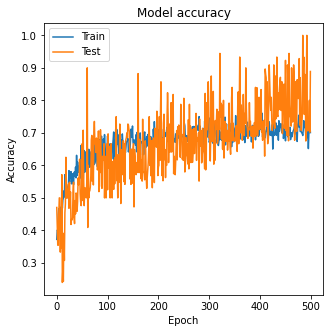

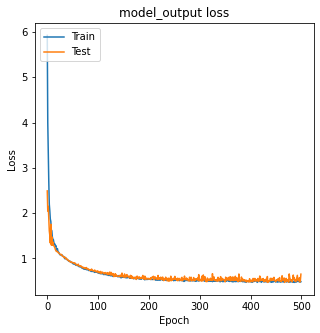

In [171]:
# Plot training & validation accuracy values
plt.plot(model_output.history['precision_1'])
plt.plot(model_output.history['val_precision_1'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# b. Predict labels for new data (test data)

In [172]:
y_pred = model.predict(x_test)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')

# c. Evaluate your model and show relevant performance metrics (like precision, recall etc.)

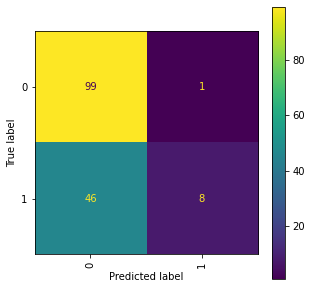

In [173]:
cm = confusion_matrix(y_test, y_pred1)
unique_label = np.unique([y_test, y_pred1])
cmd = ConfusionMatrixDisplay(cm, display_labels=unique_label)
cmd.plot(xticks_rotation='vertical')

In [174]:
from pprint import pprint
pprint(classification_report(y_test, y_pred1))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.68      0.99      0.81       100\n'
 '           1       0.89      0.15      0.25        54\n'
 '\n'
 '    accuracy                           0.69       154\n'
 '   macro avg       0.79      0.57      0.53       154\n'
 'weighted avg       0.76      0.69      0.61       154\n')


In [175]:
precision_score(y_test,y_pred1)

0.8888888888888888

# d. Fine tune your model using appropriate optimization parameters and attempt improvement in model performance

As a part of Hyper parameter tuning, **number of neurons**, **batch size**, **dropout rate** were adjusted, changed evaluation metrics as **precision** from accuracy

**In a medical field higher precesion matters**

In [176]:
model.save("model.h5")

# The End